In [2]:
import pandas as pd
import pandas_ta as ta
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date, datetime
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Downloading historical data for Apple Inc. (AAPL), and Google LLC (GOOGL),  Microsoft Corp. (MSFT) to files
Technological industry is strongly related, so we need information about Apple and Google price to be able to predict MSFT price movement better
    

In [3]:
#Downloading historical data for Apple Inc. (AAPL), Microsoft Corp. (MSFT), and Google LLC (GOOGL) to files

tickers = ['AAPL', 'GOOGL', 'MSFT']

for share in tickers:
    share_data = yf.download(share, start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
    
    if isinstance(share_data.columns, pd.MultiIndex):
        share_data.columns = share_data.columns.get_level_values(0)
        
    share_data.reset_index(inplace=True)    
    share_data.rename(columns={'Date':'DATE'}, inplace=True)    
    columns = share_data.columns
    columns = columns[1:]
    
    for c in columns:
        share_data.rename(columns={c: c + '_' + share}, inplace=True)
    share_data.to_csv(f'prices/historical_{share}_data.csv', index=False)
    print('*' * 18, {share}, '*' * 18)
    print(share_data.head(3))
    print('*' * 40)

[*********************100%***********************]  1 of 1 completed


****************** {'AAPL'} ******************
Price       DATE  Close_AAPL  High_AAPL  Low_AAPL  Open_AAPL  Volume_AAPL
0     2000-01-03    0.839281   0.843498  0.762428   0.786328    535796800
1     2000-01-04    0.768521   0.829440  0.758680   0.811633    512377600
2     2000-01-05    0.779767   0.828971  0.772269   0.777892    778321600
****************************************


[*********************100%***********************]  1 of 1 completed


****************** {'GOOGL'} ******************
Price       DATE  Close_GOOGL  High_GOOGL  Low_GOOGL  Open_GOOGL  Volume_GOOGL
0     2004-08-19     2.492181    2.584576   2.383393    2.483736     893181924
1     2004-08-20     2.690134    2.709259   2.496154    2.508822     456686856
2     2004-08-23     2.717207    2.818544   2.708514    2.750738     365122512
****************************************


[*********************100%***********************]  1 of 1 completed

****************** {'MSFT'} ******************
Price       DATE  Close_MSFT  High_MSFT   Low_MSFT  Open_MSFT  Volume_MSFT
0     2000-01-03   35.601448  36.231393  34.207933  35.849608     53228400
1     2000-01-04   34.398849  35.773276  34.284314  34.685188     54119000
2     2000-01-05   34.761520  35.544180  33.406184  33.940683     64059600
****************************************


### Calculate RSI, MACD, ATR, Bolliner Bands 
They tell us about:
- **RSI:** It calculates the speed and changes of price movement  
        If RSI > 70 => stock is bought out  
        If RSI < 30 => stock is sold out  
        
- **MACD:** It shows us the relation between two moving averages of price  
        -> **MACD_12_26_9** is the main indicator line 
             - (val >0) suggests increasing trend  
             - (val <0) suggest decreasing trend   
        -> **MACDs_12_26_9** is a signal line, it's the moving averege of MACD_12_26_9     
              - It doesn't tell us much, but it's relation with MACD_12_26_9 is the most important  
        -> **MACDh_12_26_9** is a histogram of the difference between MACD line and it's signal line  
            - (val > 0): the growth momentum is accelerating
            - (val < 0): downward momentum dominates
            
- **ATR:** It measures stock market variability  
    the higher value of ATR the more stock price was variable last 14 days
  
- **Bolliger Bands:** It defines the range in which the price usually moves  
    -> ** BBM_20_2.0 - Middle band:  
        It's a 20-day simple moving average (SMA) of the closing price.
    -> **BBU_20_2.0** - Upper band: it's the BBM + 2σ  
        It acts as dynamic resistance. Statistically, the price rarely stays above this line  
    -> **BBL_20_2.0** - Lower band: it's the BBM - 2σ  
        It acts like dynamic support  
    -> **BBB_20_2.0** - Band width: 
        It's a percent diversity between upper and lower bands:  
        - High BBB means that market is very volatile and stock's price movements are very nervous at the moment  
    -> **BBP_20_2.0** - %B indicator
    If:
        - value = 1.0: The price is exactly on Upper band   
        - value = 0.5: The price is exactly on Middle band  
        - value = 0.0: The price is exactly on Lower band  
        - value > 1.0: The price has broken the Upper band  
        - value < 0.0:  The price has broken the Lower band

In [4]:
for share in tickers:
    stock_data = pd.read_csv(f'prices/historical_{share}_data.csv')
    
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = stock_data.columns.get_level_values(0)
        
    ### RSI
    stock_data.ta.rsi(length=14, append=True)
    
    
    ### MACD
    stock_data.ta.macd(fast=12, slow=26, signal=9, append=True)
    
    ### ATR 
    stock_data.ta.atr(length=14, append=True)
    
    ### Bollinger Bands
    stock_data.ta.bbands(length=20,std=2, append=True)
    
    
    stock_data.to_csv(f'stock market data/ {share}_data.csv', index=False)


## Loading Macroeconomic data : 


### - FEDFUNDS - Fed Funds Rate (pol: Stopy procentowe):  
    - High interest rates typically hurt technology companies because they reduce the value of future earnings and increase borrowing costs


        DATE  FEDFUNDS
0 2000-01-01      5.45
1 2000-02-01      5.73
2 2000-03-01      5.85
3 2000-04-01      6.02
4 2000-05-01      6.27


Text(0.5, 1.0, 'Fed Funds Rate')

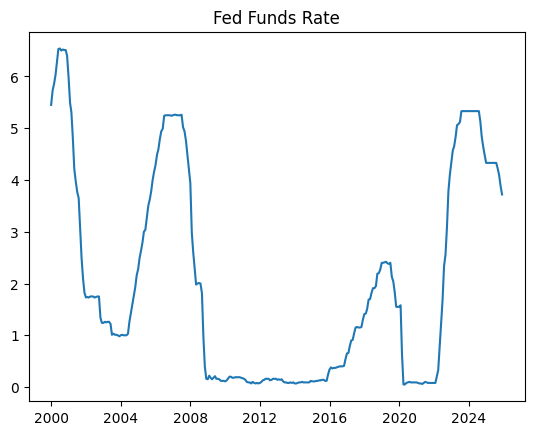

In [5]:
## Loading macro economic data
### need to install pandas-datareader 

### Fed Funds Rate (pol: Stopy procentowe)

FEDFUNDS = web.DataReader('FEDFUNDS', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
FEDFUNDS.reset_index(inplace=True)

print(FEDFUNDS.head())
FEDFUNDS.to_csv('Macroeconomic data/ FEDFUNDS.csv', index=False)

plt.plot(FEDFUNDS['DATE'], FEDFUNDS['FEDFUNDS'])
plt.title('Fed Funds Rate')
                               

### - DGS10 -  Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (pol: Rentowność Obligacji 10-letnich):  
    -The increase in bond yields often causes capital to flow out of stocks into safer bonds.


        DATE  DGS10
0 2000-01-03   6.58
1 2000-01-04   6.49
2 2000-01-05   6.62
3 2000-01-06   6.57
4 2000-01-07   6.52


Text(0.5, 1.0, 'DGS10')

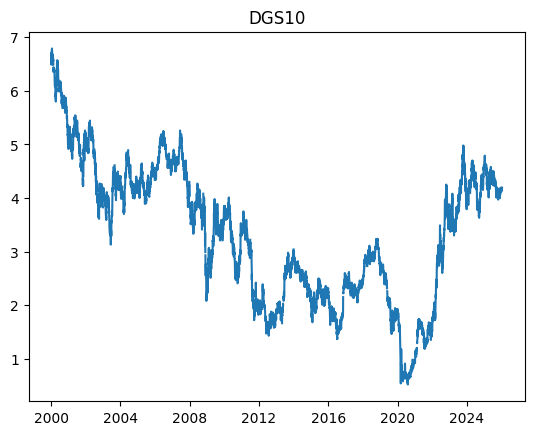

In [6]:
### Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (pol: Rentowność Obligacji 10-letnich)

DGS10 = web.DataReader('DGS10', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
DGS10.reset_index(inplace=True)
print(DGS10.head())
DGS10.to_csv('Macroeconomic data/ DGS10.csv', index=False)
plt.plot(DGS10['DATE'], DGS10['DGS10'])
plt.title('DGS10')

### - CPI - Inflation Indicator (pol: Wskaźnik Inflacji)
    - High inflation could force the Fed to raise interest rates, which would indirectly hurt stock's valuation. On the other hand, stock with a strong market position can pass on costs to customers (pricing power).

        DATE    CPI
0 2000-01-01  169.3
1 2000-02-01  170.0
2 2000-03-01  171.0
3 2000-04-01  170.9
4 2000-05-01  171.2
5 2000-06-01  172.2
6 2000-07-01  172.7
7 2000-08-01  172.7
8 2000-09-01  173.6
9 2000-10-01  173.9


Text(0.5, 1.0, 'CPI')

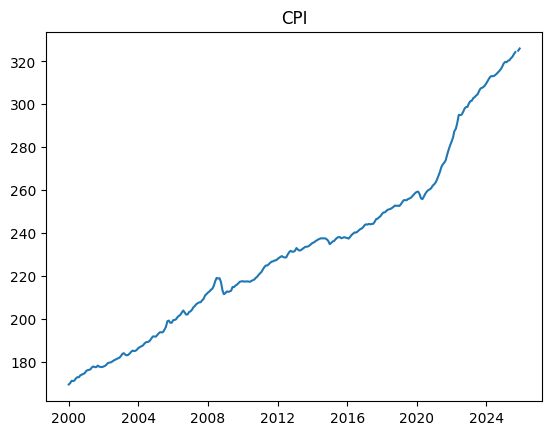

In [7]:
### CPI (pol: Wskaznik inflacji)

CPI = web.DataReader("CPIAUCSL", 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
CPI.reset_index(inplace=True)
CPI.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
print(CPI.head(10))
CPI.to_csv('Macroeconomic data/ CPI.csv', index=False)
plt.plot(CPI['DATE'], CPI['CPI'])
plt.title('CPI')

### - Dollar index (pol: Indeks dollara):  
    -A strong dollar (high index) means that foreign profits are lower when converted into dollars, which negatively affects the company's financial results.


        DATE  Dollar_idx
0 2006-01-02    101.4155
1 2006-01-03    100.7558
2 2006-01-04    100.2288
3 2006-01-05    100.2992
4 2006-01-06    100.0241
5 2006-01-09    100.1794
6 2006-01-10    100.1436
7 2006-01-11     99.8710
8 2006-01-12    100.0643
9 2006-01-13     99.9675


Text(0.5, 1.0, 'Dollar Index')

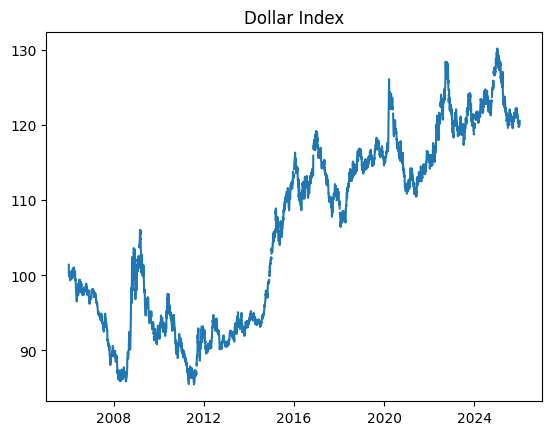

In [8]:
### Dollar index 

Dollar_idx = web.DataReader('DTWEXBGS', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
Dollar_idx.reset_index(inplace=True)
Dollar_idx.rename(columns={'DTWEXBGS': 'Dollar_idx'}, inplace=True)
print(Dollar_idx.head(10))
Dollar_idx.to_csv('Macroeconomic data/ Dollar_idx.csv', index=False)
plt.plot(Dollar_idx['DATE'], Dollar_idx['Dollar_idx'])
plt.title('Dollar Index')


Text(0.5, 1.0, 'All Macroeconomic datasets plots')

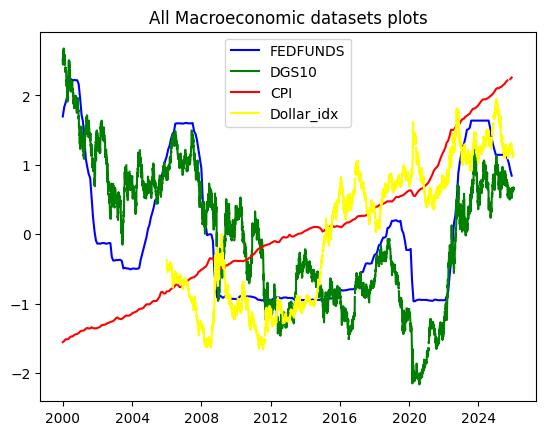

In [9]:
### Setting the same data time for all data

macroeconomic_datasets = [FEDFUNDS, DGS10, CPI, Dollar_idx]
labels = ['FEDFUNDS', 'DGS10', 'CPI', 'Dollar_idx']
plot_colors = ['blue', 'green', 'red', 'yellow', 'black']
scaler = StandardScaler()

for idx, dataset in enumerate(macroeconomic_datasets):
    dataset.sort_values('DATE', inplace=True)
    dataset.reset_index(drop=True, inplace=True)
    dataset[labels[idx] + "_scaled"] = scaler.fit_transform(dataset[[labels[idx]]])
    plt.plot(dataset['DATE'], dataset[labels[idx] + '_scaled'], color=plot_colors[idx])
    dataset.drop(labels[idx] + '_scaled', inplace=True, axis=1)
plt.legend(labels)
plt.title('All Macroeconomic datasets plots')



### VIX - FEAR INDEX:

   VIX < 20-> Relative calm on the stock market  
   VIX 20 - 30 -> Increased volatility, uncertainty  
   VIX > 30 -> Panic on the stock market   

In [10]:
## FEAR INDEX

start_date = datetime(year=2000, month=1, day=1)
end_date = date.today().strftime('%Y-%m-%d')
fear_idx = yf.download(tickers= '^VIX',
                   start=start_date,
                   end=end_date,
                   auto_adjust=True,
                   progress=False,
                   interval="1d")
fear_idx.columns = [col[0] for col in fear_idx.columns]
fear_idx = pd.DataFrame(fear_idx)
fear_idx['VIX_percent'] = fear_idx['Close'].pct_change()
fear_idx.dropna(inplace=True)
fear_idx['Is_Panic'] = (fear_idx['Close'] > 30).astype(int)
fear_idx['Is_Calm'] = (fear_idx['Close'] < 20).astype(int)
fear_idx['Is_Uncertain'] = ((fear_idx['Close'] >= 20) & (fear_idx['Close'] <= 30)).astype(int)

fear_idx.reset_index(inplace=True)
fear_idx.rename(columns={'Date':'DATE'}, inplace=True)
fear_idx.to_csv('fear and sentiment data/ fear_idx.csv', index=False)
fear_idx.head()

,DATE,Close,High,Low,Open,Volume,VIX_percent,Is_Panic,Is_Calm,Is_Uncertain
0,2000-01-04,27.010000,27.180000,24.799999,24.940001,0,0.115655,0,0,1
1,2000-01-05,26.410000,29.000000,25.850000,27.980000,0,-0.022214,0,0,1
2,2000-01-06,25.730000,26.709999,24.700001,26.680000,0,-0.025748,0,0,1
3,2000-01-07,21.719999,25.170000,21.719999,25.139999,0,-0.155849,0,0,1
4,2000-01-10,21.709999,22.490000,21.360001,21.889999,0,-0.000460,0,0,1


### FINANCIAL NEWS SENTIMENT
-    It measures uncertainty of the economic policy  
      High uncertainty causes investors to avoid risk, which may hinder price growth in technology stocks.

In [11]:
### FINANCIAL NEWS

financial_sentiment = web.DataReader('USEPUINDXD', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
financial_sentiment.reset_index(inplace=True)
print(financial_sentiment.head())
financial_sentiment.to_csv('fear and sentiment data/ financial_sentiment.csv', index=False)

        DATE  USEPUINDXD
0 2000-01-01       68.04
1 2000-01-02      119.36
2 2000-01-03       35.73
3 2000-01-04      109.31
4 2000-01-05      123.22


In [12]:
### MERGE ALL DATASETS TOGETHER

GOOGL = pd.read_csv('stock market data/ GOOGL_data.csv')
AAPL = pd.read_csv('stock market data/ AAPL_data.csv')
MSFT = pd.read_csv('stock market data/ MSFT_data.csv')

stock_dfs = {
    'MSFT': MSFT,
    'AAPL': AAPL,
    'GOOGL': GOOGL
}
for share in stock_dfs.keys():
    main_share = stock_dfs[share]
    datasets = [FEDFUNDS, DGS10, CPI, Dollar_idx, financial_sentiment, fear_idx]
    data = main_share.copy()
    data['DATE'] = pd.to_datetime(data['DATE'])
    
    for other_share in stock_dfs.keys():
        if other_share != share:
            other_data = pd.read_csv(f'prices/historical_{other_share}_data.csv')
            datasets.append(other_data)
                
    for dataset in datasets:
        dataset['DATE'] = pd.to_datetime(dataset['DATE'])
        data = pd.merge(data, dataset, on='DATE', how='left')
    
    features = [col for col in data.columns if col not in ['Target', 'DATE']]
    data[features] = data[features].shift(1) #model needs to see data from yesterday
    print('*' * 18, share, '*' * 18 )
    print(data.head(3))
    print('*' * 40)
    
    stock_dfs[share] = data

****************** MSFT ******************
        DATE  Close_MSFT  High_MSFT   Low_MSFT  Open_MSFT  Volume_MSFT  \
0 2000-01-03         NaN        NaN        NaN        NaN          NaN   
1 2000-01-04   35.601448  36.231393  34.207933  35.849608   53228400.0   
2 2000-01-05   34.398849  35.773276  34.284314  34.685188   54119000.0   

   RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  ...  Close_AAPL  \
0     NaN           NaN            NaN            NaN  ...         NaN   
1     NaN           NaN            NaN            NaN  ...    0.839281   
2     0.0           NaN            NaN            NaN  ...    0.768521   

   High_AAPL  Low_AAPL  Open_AAPL  Volume_AAPL  Close_GOOGL  High_GOOGL  \
0        NaN       NaN        NaN          NaN          NaN         NaN   
1   0.843498  0.762428   0.786328  535796800.0          NaN         NaN   
2   0.829440  0.758680   0.811633  512377600.0          NaN         NaN   

   Low_GOOGL  Open_GOOGL  Volume_GOOGL  
0        NaN         

In [13]:
### CLEANING DATA
for share in tickers:
    data = stock_dfs[share]
    data.ffill(inplace=True)
    data.dropna(inplace=True)
    
    for c in ['Close', 'High', 'Low', 'Open', 'Volume']:
        data.rename(columns={c: c+'_VIX'}, inplace=True)
    data.drop('Volume_VIX', inplace=True, axis=1)
    print("*" * 18, share, '*' * 18 )
    print(data.head())
    print('*' * 40)
    
    data.to_csv(f'all_data/ all_{share}_data.csv', index=False)

****************** AAPL ******************
           DATE  Close_AAPL  High_AAPL  Low_AAPL  Open_AAPL  Volume_AAPL  \
1509 2006-01-04    2.241831   2.241831  2.166853   2.170752  807234400.0   
1510 2006-01-05    2.248429   2.278720  2.234333   2.253228  619603600.0   
1511 2006-01-06    2.230734   2.246329  2.211839   2.244229  449422400.0   
1512 2006-01-09    2.288317   2.300314  2.235833   2.256827  704457600.0   
1513 2006-01-10    2.280818   2.315309  2.271521   2.301212  675040800.0   

         RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  ...  Close_MSFT  \
1509  63.192634      0.052154      -0.013956       0.066110  ...   18.715061   
1510  63.759317      0.053152      -0.010366       0.063518  ...   18.805708   
1511  61.045109      0.051916      -0.009282       0.061198  ...   18.819649   
1512  66.102106      0.054950      -0.004998       0.059948  ...   18.763874   
1513  64.920153      0.056103      -0.003076       0.059179  ...   18.729006   

      High_MSFT   L

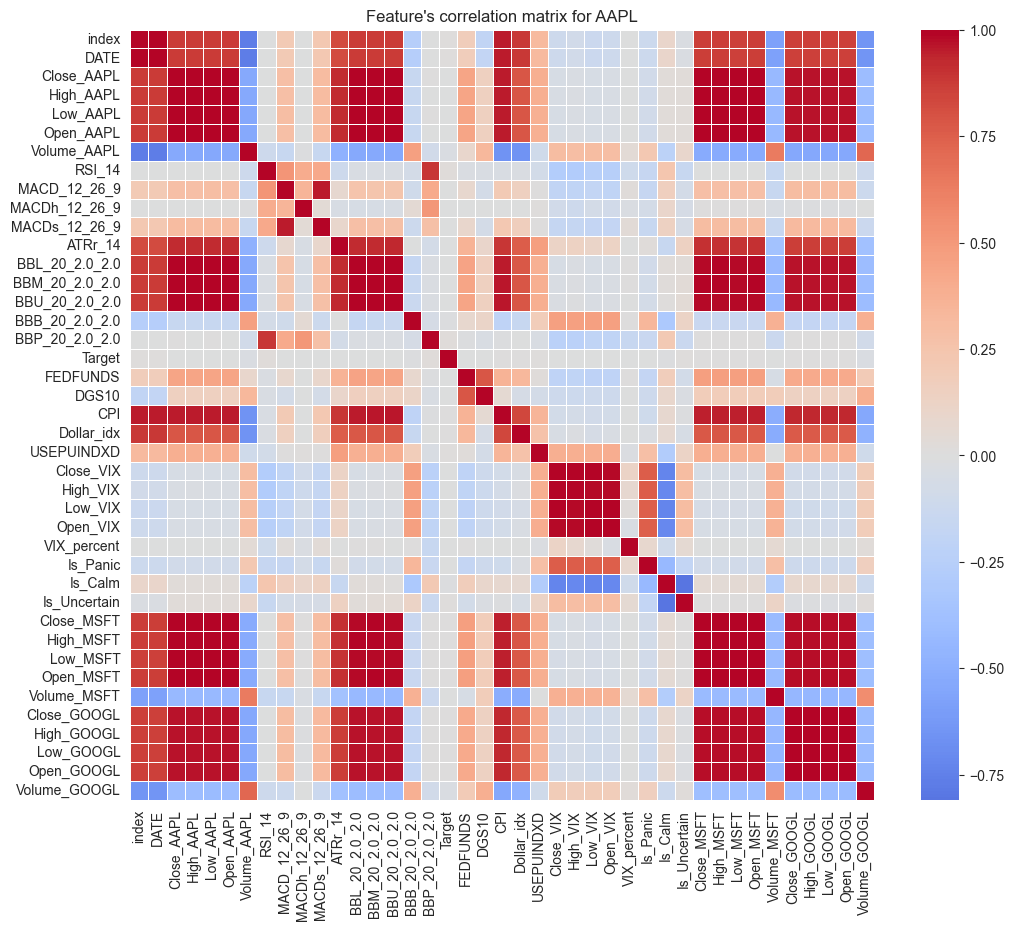

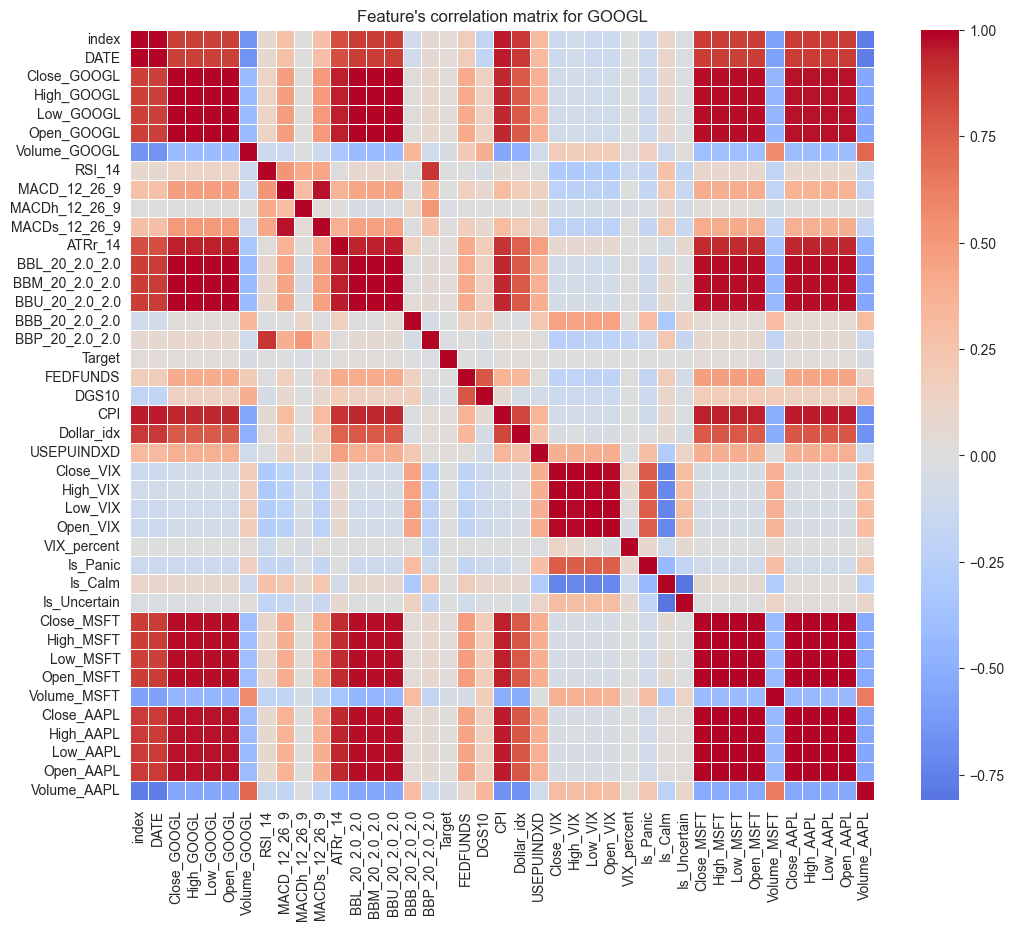

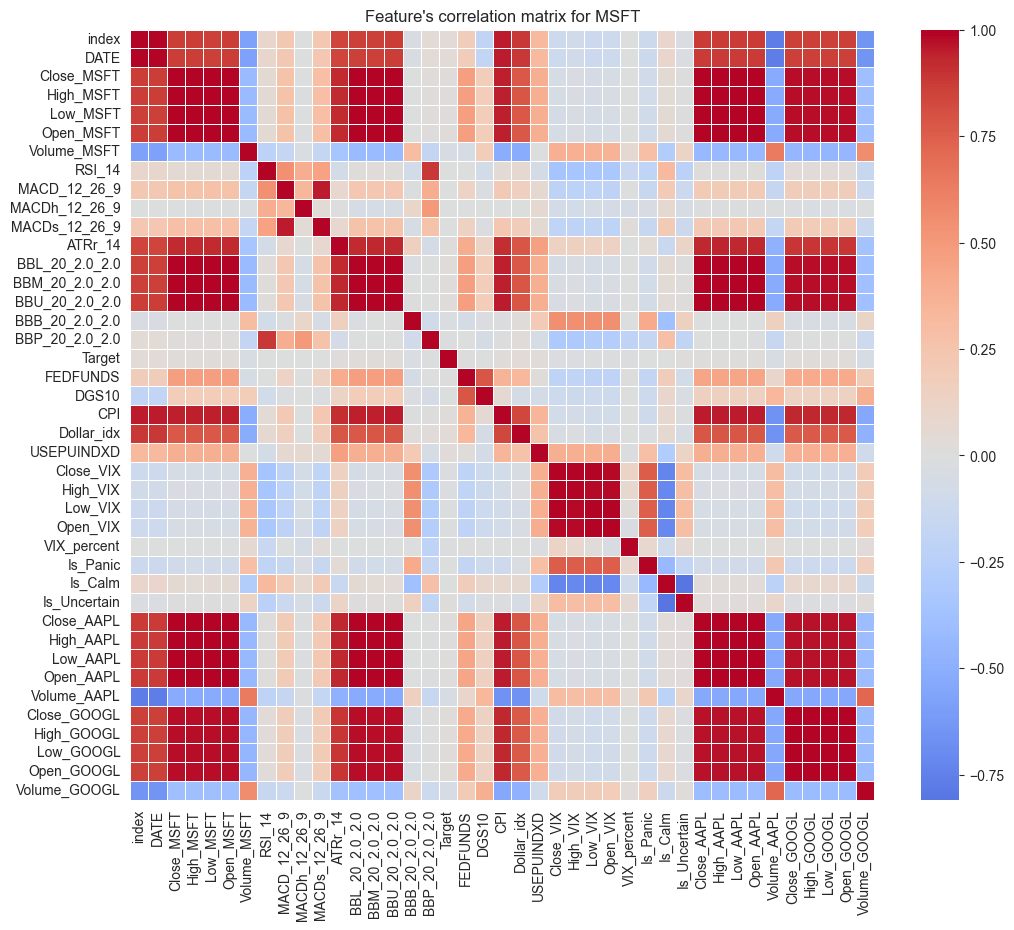

In [42]:
#### HEATMAP OF CORRELACTION  MATRIX
for share in tickers:
    data = stock_dfs[share]
    corr_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, 
                annot=False,     
                cmap='coolwarm',    
                center=0, 
                linewidths=.5)
    
    plt.title(f"Feature's correlation matrix for {share}")
    plt.savefig(f'Feature_corr_matrix_for_{share}.png')
    plt.show()